In [1]:
import pandas as pd #data frame
import seaborn as sns # analysis / visualization
from matplotlib import pyplot as plt  # ploting
import numpy as np       # linear algebra calculation
from sklearn.model_selection import train_test_split as tts  # data spliting
from sklearn.tree import DecisionTreeClassifier # decision tree algoritm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

import warnings as w
w.filterwarnings('ignore')

In [2]:
df = pd.read_excel("heart failure.xlsx")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1.0


In [3]:
df.shape

(299, 13)

In [4]:
df.DEATH_EVENT.value_counts()

0.0    203
1.0     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

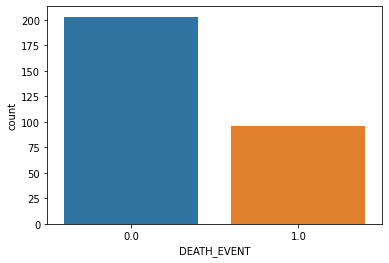

In [5]:
sns.countplot(df.DEATH_EVENT)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

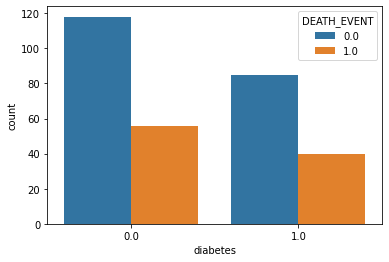

In [6]:
sns.countplot (x='diabetes',hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

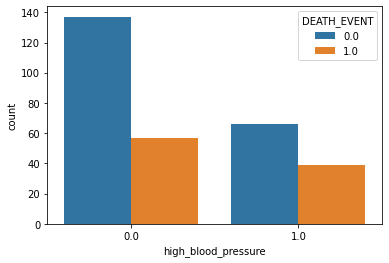

In [7]:
sns.countplot (x='high_blood_pressure',hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

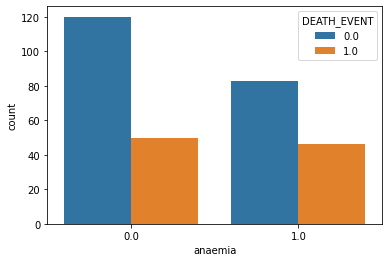

In [8]:
sns.countplot (x='anaemia',hue='DEATH_EVENT', data=df)

In [9]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:title={'center':'Correlation for Every Column'}>

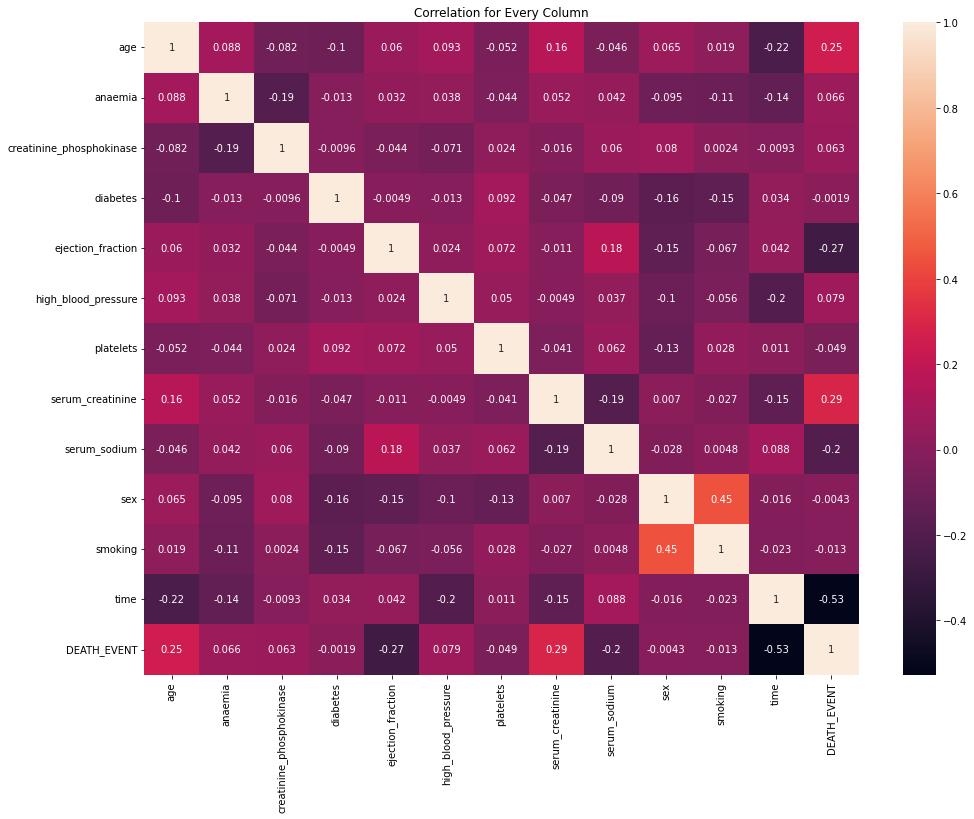

In [10]:
plt.figure(figsize=(16,12))
plt.title('Correlation for Every Column')
sns.heatmap(df.corr() , annot=True)

# Seperate X,Y

In [11]:
x=df.drop('DEATH_EVENT',axis='columns')

In [12]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0


In [13]:
y=df['DEATH_EVENT']

In [14]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DEATH_EVENT, dtype: float64

# Split the dataset into train and test

In [15]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=.30,random_state=1)

In [16]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1.0,80.0,0.0,30.0,1.0,427000.0,1.0,138.0,0.0,0.0,12.0
210,70.0,0.0,212.0,1.0,17.0,1.0,389000.0,1.0,136.0,1.0,1.0,188.0
236,75.0,0.0,119.0,0.0,50.0,1.0,248000.0,1.1,148.0,1.0,0.0,209.0
44,60.0,1.0,588.0,1.0,60.0,0.0,194000.0,1.1,142.0,0.0,0.0,33.0
163,50.0,1.0,2334.0,1.0,35.0,0.0,75000.0,0.9,142.0,0.0,0.0,126.0


In [17]:
xtrain.shape

(209, 12)

In [18]:
xtest.shape

(90, 12)

In [19]:
clf = DecisionTreeClassifier()# object create for decision tree

In [20]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

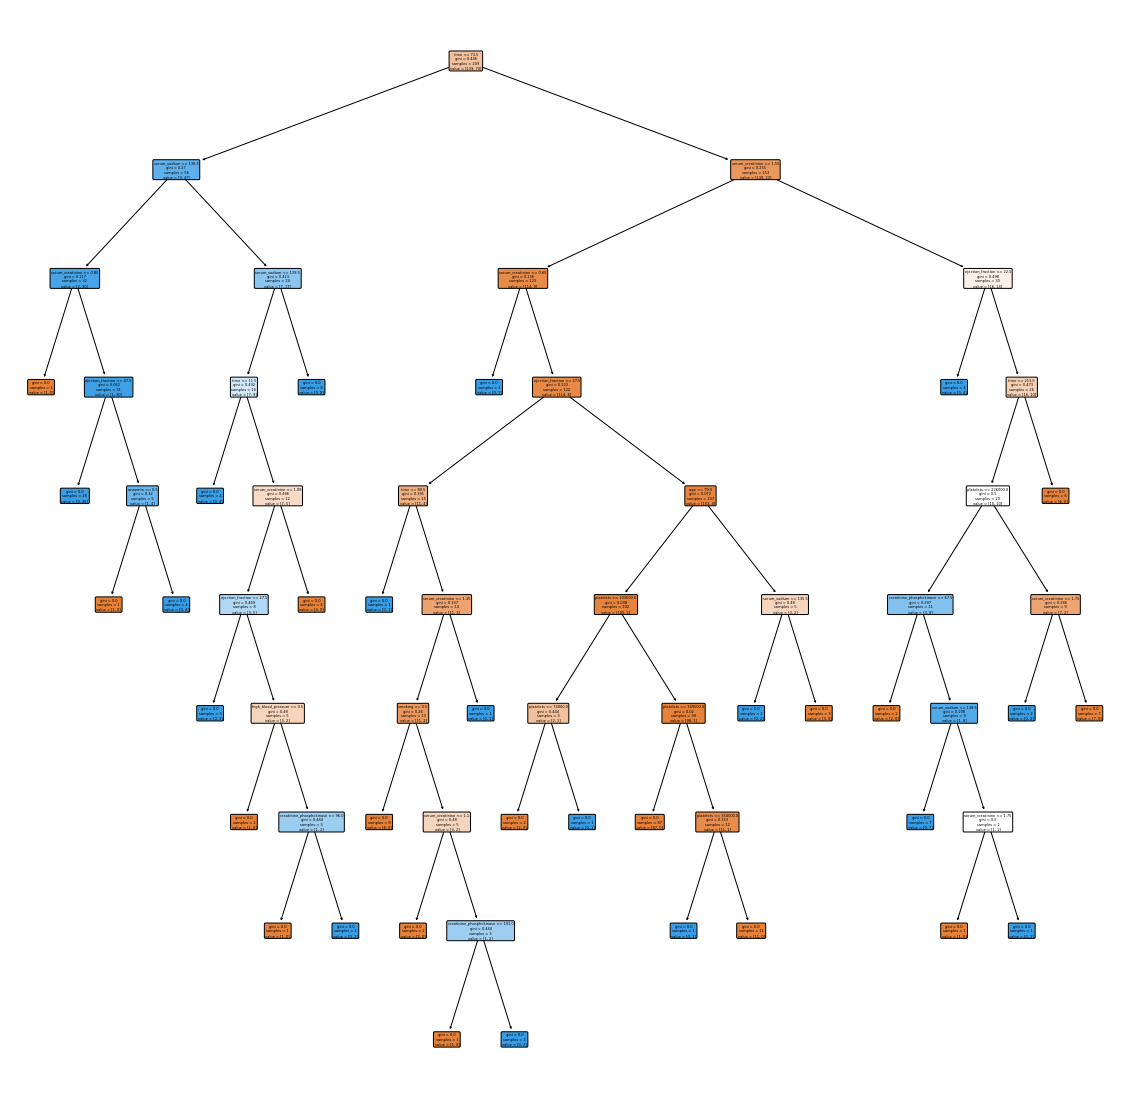

In [21]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf, filled=True, rounded=True, feature_names=x.columns)
plt.savefig('tree.png', dpi=1200)

In [22]:
pred =clf.predict(xtest)

In [23]:
pred # predicted result

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1.])

In [24]:
np.array(ytest) # Actual result

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1.])

# Confusion Matrix

In [25]:
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve


In [26]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n         0.0       0.85      0.89      0.87        64\n         1.0       0.70      0.62      0.65        26\n\n    accuracy                           0.81        90\n   macro avg       0.77      0.75      0.76        90\nweighted avg       0.81      0.81      0.81        90\n'

In [27]:
print (classification_report(ytest,pred))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87        64
         1.0       0.70      0.62      0.65        26

    accuracy                           0.81        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.81      0.81      0.81        90



In [28]:
cm= confusion_matrix(ytest, pred)

In [29]:
cm

array([[57,  7],
       [10, 16]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

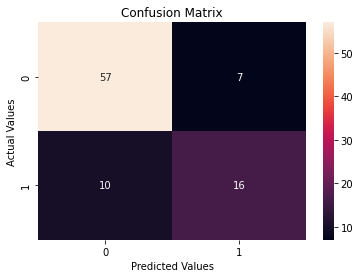

In [30]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')


In [31]:
tp, fn, fp, tn = confusion_matrix(ytest, pred).reshape(-1)

In [32]:
tp

57

In [33]:
fn

7

In [34]:
fp

10

In [35]:
tn

16

# Home Work

In [36]:
# All performance parameters from slide

In [37]:
#Precision or Positive predictive Value(PPV)

precision = tp/(tp+fp)

In [38]:
ppv=precision

In [39]:
ppv

0.8507462686567164

In [40]:
#Sensitivity,Recall,Hit Rate,Or True Positive Rate(TPR)

In [41]:
TPR=tp/(tp+fn)

In [42]:
TPR

0.890625

In [57]:
# False Positive Rate (FPR) Or 1-Spcificity
fpr=fp /(fp+tn)

In [58]:
fpr

0.38461538461538464

In [60]:
# F1 measure
F1Measure=(ppv+TPR)/2

In [61]:
F1Measure

0.8706856343283582

In [62]:
#Harmonic Mean,F1 Score
F1=(2*ppv*TPR)/(ppv+TPR)

In [64]:
F1

0.8702290076335878

In [74]:
# Specificity,Selectivity or Negative Rate (TNR)
spc = tn/(tn+fp)

In [75]:
spc

0.6153846153846154

In [76]:
# threat Score (TS) or Critical Success Index(CSI)
CSI = tp/(tp + fp)

In [77]:
CSI

0.8507462686567164

In [78]:
# False Discovery Rate (FDR)
FDR=fp/(tp + fp)

In [79]:
FDR

0.14925373134328357

# AUC

In [44]:
from sklearn.metrics import plot_roc_curve

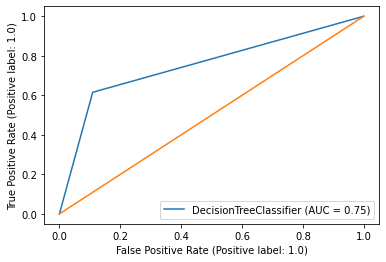

In [45]:
plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1],[0,1])

In [46]:
accuracy_score(ytest, pred)

0.8111111111111111

In [47]:
clf.score(xtest, ytest)

0.8111111111111111

In [48]:
(tp+tn) / (tp+tn+fp+fn)

0.8111111111111111